# Distribution de l'ELO (Graphe)

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [16]:
df = pd.read_csv("../../data/processed/clear_elo_distribution_data.csv")
print(df)

          Rank    Tier %
0   Challenger  0.00015%
1  GrandMaster   0.0015%
2       Master    0.074%
3      Diamond      1.9%
4      Emerald      6.0%
5     Platinum      9.4%
6         Gold       14%
7       Silver       20%
8       Bronze       20%
9         Iron       27%


/var/folders/rm/156h65l10d97x8yvj074kbkr0000gn/T/ipykernel_92653/835720332.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df['Rank'], y=df['Tier %'], palette='Blues_d')  # Histogramme vertical


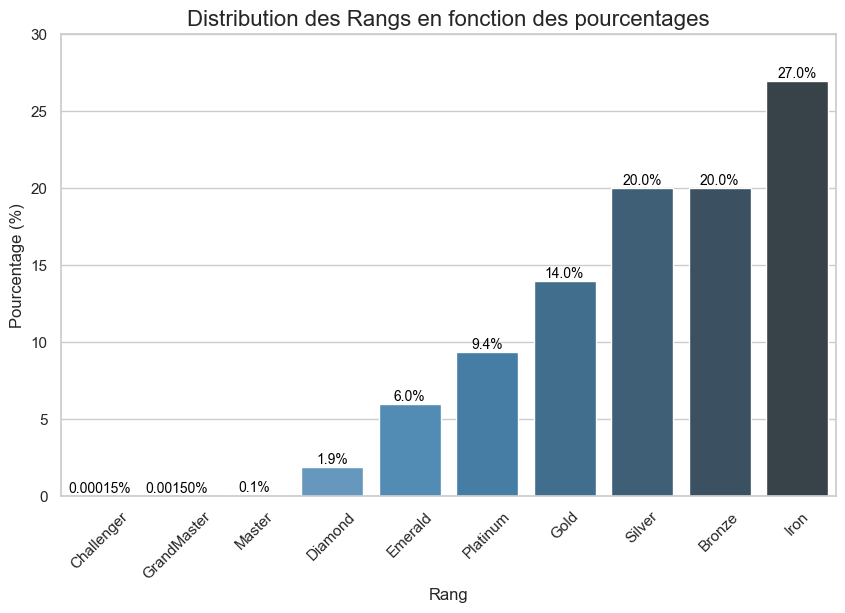

In [37]:
# Convertir les pourcentages en valeurs numériques (en enlevant le signe "%")
df['Tier %'] = df['Tier %'].replace('%', '', regex=True).astype(float)

# Créer l'histogramme
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df['Rank'], y=df['Tier %'], palette='Blues_d')  # Histogramme vertical
plt.title('Distribution des Rangs en fonction des pourcentages', fontsize=16)
plt.xlabel('Rang', fontsize=12)
plt.ylabel('Pourcentage (%)', fontsize=12)
plt.xticks(rotation=45)

# Inverser l'axe des Y pour que les barres sortent vers le bas
plt.gca().invert_yaxis()

# Fixer l'échelle de l'axe Y de 0 à 30% et ajouter des graduations tous les 5%
plt.ylim(0, 30)
plt.yticks([i for i in range(0, 31, 5)])

# Ajouter les pourcentages en haut des barres
for p in ax.patches:
    percentage = p.get_height()  # Obtenir la hauteur de la barre (le pourcentage)
    
    # Si le pourcentage est trop petit, afficher une valeur personnalisée (ex: 0.00015%)
    if percentage < 0.01:
        label = f'{percentage:.5f}%'  # Afficher avec 5 décimales pour les très petites valeurs
    else:
        label = f'{percentage:.1f}%'  # Afficher avec 1 décimale pour les autres

    ax.annotate(label, 
                (p.get_x() + p.get_width() / 2., percentage), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Afficher le graphique
plt.show()